# Project 5 Part 2

## Thankam Abish and Joseph Naro

In [198]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [199]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('C:/Users/Thank/Documents/GraduateSchool/EAS510/Project5/ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1', parse_dates=True) 

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('C:/Users/Thank/Documents/GraduateSchool/EAS510/Project5/ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
movies = pd.read_csv('C:/Users/Thank/Documents/GraduateSchool/EAS510/Project5/ml-100k/u.item', sep='|', names=m_cols, usecols=range(24),
                     encoding='latin-1')

movie_ratings = pd.merge(movies, ratings)
df = pd.merge(movie_ratings, users)

In [200]:
df.shape

(100000, 31)

In [201]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [202]:
ratings.describe()

,user_id,movie_id,rating,unix_timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


#### Since there is an imbalance in the dataset, we will create a model for both an imbalanced dataset and a balanced dataset. 

#### As you can see from the bar chart, higher ratings are much more common than lower rankings such as 1 or 2

Text(0, 0.5, 'Counts')

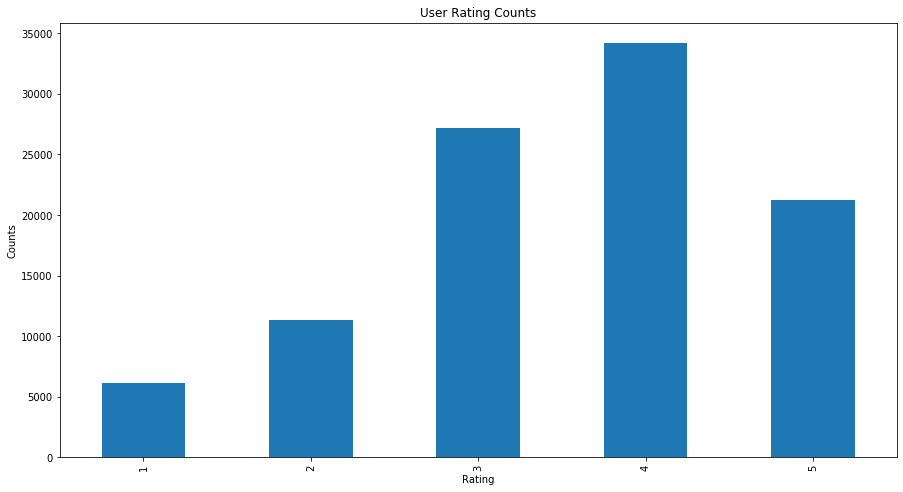

In [203]:
a = df.rating.value_counts(sort = False).plot(kind='bar', title = 'User Rating Counts')
a.set_xlabel('Rating')
a.set_ylabel('Counts')

In [204]:
display(users.head(5),ratings.head(5),movies.head(5))

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [205]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

##### We are using undersampling to balance our dataset so since the lowest number of rankings is for 1, we will sample the same size as ranking 1 for 2,3,4,and 5 to create a balanced dataset.

In [206]:
rating1 = ratings[ratings['rating']==1]
rating1.shape
rating2 = ratings[ratings['rating']==2]
rating2 = rating2.sample(n=6110,random_state=42)
rating3 = ratings[ratings['rating']==3]
rating3 = rating3.sample(n=6110,random_state=42)
rating4 = ratings[ratings['rating']==4]
rating4 = rating4.sample(n=6110,random_state=42)
rating5 = ratings[ratings['rating']==5]
rating5 = rating5.sample(n=6110,random_state=42)

In [207]:
balanced_ratings = rating1.append(rating2, ignore_index=True)
balanced_ratings = balanced_ratings.append(rating3, ignore_index=True)
balanced_ratings = balanced_ratings.append(rating4, ignore_index=True)
balanced_ratings = balanced_ratings.append(rating5, ignore_index=True)
display(ratings.head(5), balanced_ratings.head(6))

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


,user_id,movie_id,rating,unix_timestamp
0,22,377,1,878887116
1,166,346,1,886397596
2,181,1081,1,878962623
3,276,796,1,874791932
4,20,288,1,879667584
5,167,232,1,892738341


#### Visually verifying our dataset is balanced now in terms of ranking

Text(0, 0.5, 'Counts')

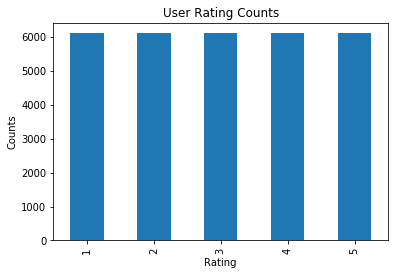

In [208]:
a = balanced_ratings.rating.value_counts(sort = False).plot(kind='bar', title = 'User Rating Counts')
a.set_xlabel('Rating')
a.set_ylabel('Counts')

### Model Using Imbalanced Dataset

In [209]:
num_users = ratings['user_id'].unique()
num_users = num_users.shape[0]
num_mov = ratings['movie_id'].unique()
num_mov = num_mov.shape[0]
print('Number of Users: ', num_users)
print('Number of Movies: ', num_mov)

Number of Users:  943
Number of Movies:  1682


In [210]:
u_enc = LabelEncoder()
ratings['u'] = u_enc.fit_transform(ratings['user_id'].values)

m_enc = LabelEncoder()
ratings['m'] = m_enc.fit_transform(ratings['movie_id'].values)

In [211]:
ratings['rating'] = ratings['rating'].values.astype(np.float32)

In [212]:
ratings.head(5)

,user_id,movie_id,rating,unix_timestamp,u,m
0,196,242,3.0,881250949,195,241
1,186,302,3.0,891717742,185,301
2,22,377,1.0,878887116,21,376
3,244,51,2.0,880606923,243,50
4,166,346,1.0,886397596,165,345


In [213]:
X = ratings[['u', 'm']]
X = X.to_numpy()
Y = ratings['rating']
#Y = Y.to_numpy()
Y = Y.apply(lambda x: (x-1)/(5-1)).values
Y = Y.flatten()
display(X.shape, Y.shape)

(100000, 2)

(100000,)

#### We split our dataset into a 70:30 ratio training testing set

In [214]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 123)
print('trainX shape: ', trainX.shape)
print('trainY shape: ', trainY.shape)
print('testX shape: ', testX.shape)
print('testY shape: ', testY.shape)

trainX shape:  (80000, 2)
trainY shape:  (80000,)
testX shape:  (20000, 2)
testY shape:  (20000,)


In [215]:
trainX = [trainX[:,0],trainX[:,1]]
testX = [testX[:,0],testX[:,1]]

In [216]:
factors = 50
from keras.models import Model
from keras.layers.merge import Dot, multiply, concatenate
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers import Add, Activation, Lambda
from keras.layers import Concatenate, Dense, Dropout

#### The deep learning method we have chosen is a neutral collaborative filtering network which contains two inputs, one for the user vector and one for the movie vector. We have created 2 embedded layers that are concatenated with a dropout of 0.05. Then we have 2 fully connected layers with relu activation and dropout of 0.2. Our final output layer uses sigmoid activation. We chose an adam optimizer with a 0.001 learning rate. Lastly, our loss is evaluated using mean absolute error.

#### We attempted using different optimizers and learning rates, however this did not decrease our loss. This model gave us a 0.18 validation loss, and this was the best result we could get. We also tried increasing the number of layers in the network however this decreased accuracy. We also tried adding a bias term, but this also did not improve our results for this dataset.

In [217]:
user = Input(shape=(1,))
u = Embedding(num_users, factors, embeddings_initializer = 'he_normal', embeddings_regularizer = l2(1e-6))(user)
u = Reshape((factors,))(u)
#ub = Embedding(num_users, 1)(user)
#u = Reshape((factors,))(ub)

movie = Input(shape=(1,))
m = Embedding(num_mov, factors, embeddings_initializer = 'he_normal', embeddings_regularizer = l2(1e-6))(movie)
m = Reshape((factors,))(m)
#mb = Embedding(num_mov, 1)(movie)
#m = Reshape((factors,))(mb)

# = multiply([u, m])
x = Concatenate()([u, m])
x = Dropout(0.05)(x)
#x = Concatenate()([x, ub, mb])
#x = Dropout(0.05)(x)

#x = Dense(100, kernel_initializer='he_normal')(x)
#x = Activation('relu')(x)
#x = Dropout(0.5)(x)

x = Dense(50, kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)

x = Dense(10, kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)

x = Dense(1, kernel_initializer='he_normal')(x)
x = Activation('sigmoid')(x)
#x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)
model = Model(inputs=[user, movie], outputs=x)
opt = Adam(lr=0.001)
model.compile(loss='mean_absolute_error', optimizer=opt)

In [218]:
model.summary()

Model: "functional_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_23 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_30 (Embedding)        (None, 1, 50)        47150       input_22[0][0]                   
__________________________________________________________________________________________________
embedding_31 (Embedding)        (None, 1, 50)        84100       input_23[0][0]                   
______________________________________________________________________________________

In [219]:
history = model.fit(x=trainX, y=trainY, batch_size=64, epochs=4,
                    verbose=1, validation_data=(testX, testY))

Epoch 1/4
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2005 - val_loss: 0.1877
Epoch 2/4
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1842 - val_loss: 0.1841
Epoch 3/4
1250/1250 [==============================] - 2s 2ms/step - loss: 0.1784 - val_loss: 0.1824
Epoch 4/4
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1748 - val_loss: 0.1823


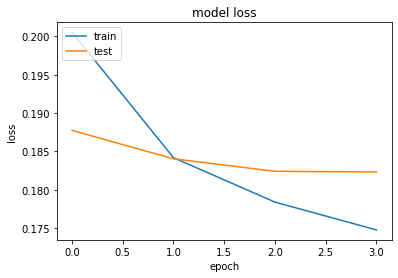

In [220]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [221]:
pred = model.predict(testX).flatten()

In [222]:
end = pd.DataFrame(list(zip(pred, testY)), 
               columns =['predicted', 'actual'])
end.head(20)

,predicted,actual
0,0.943004,0.75
1,0.713411,1.00
2,0.813897,1.00
3,0.730870,0.50
4,0.682843,0.75
5,0.763554,1.00
6,0.327729,0.25
7,0.704020,0.75
8,0.790051,0.75
9,0.673128,0.50


In [223]:
def pred_eval(threshold):
    good_pred = end.loc[end['predicted'] >= threshold]
    correct_pred = good_pred.loc[good_pred['actual'] >= threshold]
    acc_good = correct_pred.shape[0]/good_pred.shape[0]

    good_pred = end.loc[end['predicted'] < threshold]
    correct_pred = good_pred.loc[good_pred['actual'] < threshold]
    acc_bad = correct_pred.shape[0]/good_pred.shape[0]
    
    return acc_good, acc_bad

#### In order to better understand how well our model worked. We evaluated based on a threshold defining a good movie from a bad movie. Since our dataset has been min-max normalized we considered 0.7 on a 0-1 scale to be an appropriate threshold. As you can see our model generally detects good movies well, however it performs worse when needed to identify bad movies. This could possibly be a result of the imbalanced dataset. Our model is unable to identify bad movies as well as good movies because of the lack of ratings for bad movies.

In [224]:
threshold = 0.7

g, b = pred_eval(threshold)
print('With Respect to Threshold: ', threshold)
print('Predicted Good Movies Correctly: ', g)
print('Predicted Bad Movies Correctly: ', b)

With Respect to Threshold:  0.7
Predicted Good Movies Correctly:  0.7463957426221577
Predicted Bad Movies Correctly:  0.6473874806001034


In [225]:
full = pd.DataFrame(list(zip(testX[0], testX[1], pred, testY)),
                   columns = ['user','movie','prediction','actual'])
full.head(5)

,user,movie,prediction,actual
0,599,650,0.943004,0.75
1,606,493,0.713411,1.00
2,874,1102,0.813897,1.00
3,647,237,0.730870,0.50
4,112,272,0.682843,0.75


In [226]:
def create_recommendations(user):
    movie_ids = ratings.loc[ratings['user_id'] != user]
    movie_ids = movie_ids['movie_id'].unique()
    movie_ids = pd.DataFrame(movie_ids-1, columns = ['movie_id'])
    mov = movie_ids
    mov['u'] = user-1
    u_m = mov[['u','movie_id']]
    u_m = u_m.to_numpy()
    u_m = [u_m[:,0],u_m[:,1]]
    p = model.predict(u_m).flatten()
    recs = pd.DataFrame(list(zip(u_m[0]+1, u_m[1]+1, p)),
                       columns = ['user','movie','prediction'])
    recs = recs.sort_values(by=['prediction'], ascending=False)
    top10 = recs.head(10)
    display(top10)
    for idx in top10['movie']:
        print(movies.loc[idx, 'title'])

#### This is an example recommendation for user 3 and does not contain any movies he/she has watched ranked previously.

In [227]:
create_recommendations(3)

,user,movie,prediction
180,3,408,0.962413
277,3,169,0.889195
174,3,483,0.848393
189,3,127,0.834772
1254,3,1449,0.816152
357,3,50,0.813830
297,3,12,0.801271
200,3,318,0.799842
538,3,511,0.793888
612,3,114,0.780999


Jack (1996)
Cinema Paradiso (1988)
Maltese Falcon, The (1941)
Supercop (1992)
Golden Earrings (1947)
Legends of the Fall (1994)
Mighty Aphrodite (1995)
Everyone Says I Love You (1996)
Wings of Desire (1987)
Haunted World of Edward D. Wood Jr., The (1995)


### Model Using Balanced Dataset
##### We used undersampling to balance our dataset as seen during the preprocessing cells in the beginning.

In [228]:
num_users = ratings['user_id'].unique()
num_users = num_users.shape[0]
num_mov = ratings['movie_id'].unique()
num_mov = num_mov.shape[0]
print('Number of Users: ', num_users)
print('Number of Movies: ', num_mov)
ratings = balanced_ratings

Number of Users:  943
Number of Movies:  1682


In [229]:
u_enc = LabelEncoder()
ratings['u'] = u_enc.fit_transform(ratings['user_id'].values)

m_enc = LabelEncoder()
ratings['m'] = m_enc.fit_transform(ratings['movie_id'].values)

In [230]:
ratings['rating'] = ratings['rating'].values.astype(np.float32)
ratings.head(5)

,user_id,movie_id,rating,unix_timestamp,u,m
0,22,377,1.0,878887116,21,376
1,166,346,1.0,886397596,165,345
2,181,1081,1.0,878962623,180,1072
3,276,796,1.0,874791932,275,793
4,20,288,1.0,879667584,19,287


In [231]:
X = ratings[['u', 'm']]
X = X.to_numpy()
Y = ratings['rating']
#Y = Y.to_numpy()
Y = Y.apply(lambda x: (x-1)/(5-1)).values
Y = Y.flatten()
display(X.shape, Y.shape)

(30550, 2)

(30550,)

In [232]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 123)
print('trainX shape: ', trainX.shape)
print('trainY shape: ', trainY.shape)
print('testX shape: ', testX.shape)
print('testY shape: ', testY.shape)

trainX shape:  (24440, 2)
trainY shape:  (24440,)
testX shape:  (6110, 2)
testY shape:  (6110,)


In [233]:
trainX = [trainX[:,0],trainX[:,1]]
testX = [testX[:,0],testX[:,1]]

#### Here we are using a neutral collaborative filtering network again which contains two inputs, one for the user vector and one for the movie vector. We used a bias term for the user and movies.  We have created 4 embedded layers that are concatenated with a dropout of 0.05. Then we have 2 fully connected layers with relu activation and dropout of 0.2. Our final output layer uses sigmoid activation. We chose an adam optimizer with a 0.001 learning rate. Lastly, our loss is evaluated using mean absolute error. 

#### We attempted using different optimizers and learning rates, however this did not decrease our loss. This model gave us a 0.23 validation loss. We also tried increasing the number of layers in the network however this decreased accuracy. Unliked for our imbalanced dataset, the bias terms improved results slightly and also thresholded better when determining good movies from bad movies.

In [234]:
user = Input(shape=(1,))
u = Embedding(num_users, factors, embeddings_initializer = 'he_normal', embeddings_regularizer = l2(1e-6))(user)
#u = Reshape((factors,))(u)
ub = Embedding(num_users, 1)(user)
#u = Reshape((factors,))(ub)

movie = Input(shape=(1,))
m = Embedding(num_mov, factors, embeddings_initializer = 'he_normal', embeddings_regularizer = l2(1e-6))(movie)
#m = Reshape((factors,))(m)
mb = Embedding(num_mov, 1)(movie)
#m = Reshape((factors,))(mb)

# = multiply([u, m])
x = Concatenate()([u, m])
x = Dropout(0.05)(x)
x = Concatenate()([x, ub, mb])
x = Dropout(0.05)(x)

#x = Dense(100, kernel_initializer='he_normal')(x)
#x = Activation('relu')(x)
#x = Dropout(0.5)(x)

x = Dense(50, kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)

x = Dense(10, kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)

x = Dense(1, kernel_initializer='he_normal')(x)
x = Activation('sigmoid')(x)
#x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)
model = Model(inputs=[user, movie], outputs=x)
opt = Adam(lr=0.001)
model.compile(loss='mean_absolute_error', optimizer=opt)

In [235]:
model.summary()

Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_25 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_32 (Embedding)        (None, 1, 50)        47150       input_24[0][0]                   
__________________________________________________________________________________________________
embedding_34 (Embedding)        (None, 1, 50)        84100       input_25[0][0]                   
______________________________________________________________________________________

In [236]:
history = model.fit(x=trainX, y=trainY, batch_size=64, epochs=4,
                    verbose=1, validation_data=(testX, testY))

Epoch 1/4
382/382 [==============================] - 1s 3ms/step - loss: 0.2717 - val_loss: 0.2365
Epoch 2/4
382/382 [==============================] - 1s 3ms/step - loss: 0.2225 - val_loss: 0.2296
Epoch 3/4
382/382 [==============================] - 1s 3ms/step - loss: 0.2087 - val_loss: 0.2298
Epoch 4/4
382/382 [==============================] - 1s 3ms/step - loss: 0.2019 - val_loss: 0.2316


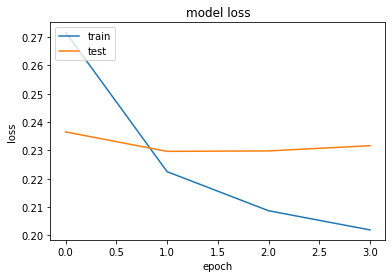

In [237]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [238]:
pred = model.predict(testX).flatten()

In [239]:
end = pd.DataFrame(list(zip(pred, testY)), 
               columns =['predicted', 'actual'])
end.head(20)

,predicted,actual
0,0.501411,0.50
1,0.610992,0.00
2,0.399179,0.25
3,0.500496,0.50
4,0.992705,1.00
5,0.670750,0.00
6,0.752510,0.25
7,0.860494,0.75
8,0.231213,0.00
9,0.086387,0.50


#### Our model created from a balanced dataset had higher loss but a better threshold. It was able to determine a bad movies better than our imbalanced dataset. The reason for higher loss could be due to us undersampling and the decrease in dataset size.

In [240]:
threshold = 0.7

g, b = pred_eval(threshold)
print('With Respect to Threshold: ', threshold)
print('Predicted Good Movies Correctly: ', g)
print('Predicted Bad Movies Correctly: ', b)

With Respect to Threshold:  0.7
Predicted Good Movies Correctly:  0.7045579352004393
Predicted Bad Movies Correctly:  0.7265096759151317


In [241]:
full = pd.DataFrame(list(zip(testX[0], testX[1], pred, testY)),
                   columns = ['user','movie','prediction','actual'])
full.head(5)

,user,movie,prediction,actual
0,631,236,0.501411,0.50
1,588,306,0.610992,0.00
2,197,818,0.399179,0.25
3,642,683,0.500496,0.50
4,502,222,0.992705,1.00


In [242]:
def create_recommendations(user):
    movie_ids = balanced_ratings.loc[balanced_ratings['user_id'] != user]
    movie_ids = balanced_ratings['movie_id'].unique()
    movie_ids = pd.DataFrame(movie_ids-1, columns = ['movie_id'])
    mov = movie_ids
    mov['u'] = user-1
    u_m = mov[['u','movie_id']]
    u_m = u_m.to_numpy()
    u_m = [u_m[:,0],u_m[:,1]]
    p = model.predict(u_m).flatten()
    recs = pd.DataFrame(list(zip(u_m[0]+1, u_m[1]+1, p)),
                       columns = ['user','movie','prediction'])
    recs = recs.sort_values(by=['prediction'], ascending=False)
    top10 = recs.head(10)
    display(top10)
    for idx in top10['movie']:
        print(movies.loc[idx, 'title'])

#### This is an example recommendation list for user 3.

In [243]:
create_recommendations(3)

,user,movie,prediction
1404,3,178,0.873539
110,3,408,0.870416
874,3,187,0.758524
296,3,50,0.757308
780,3,318,0.734942
471,3,12,0.726082
1558,3,915,0.695725
1548,3,611,0.690497
1526,3,480,0.688843
1433,3,661,0.684607


Clockwork Orange, A (1971)
Jack (1996)
Full Metal Jacket (1987)
Legends of the Fall (1994)
Everyone Says I Love You (1996)
Mighty Aphrodite (1995)
Lost in Space (1998)
Lost Horizon (1937)
Apartment, The (1960)
Somewhere in Time (1980)
